In [1]:
import numpy as np
import pandas as pd


In [2]:
df = pd.read_csv('Kaggle_Spaceship_train.csv')
df2 = pd.read_csv('Kaggle_Spaceship_test.csv')

# Find missing values

In [3]:
temp = df.copy()
temp2= df2.copy()

In [4]:
#Checking is there exists null values in the dataset or not
temp[temp.isnull().any(axis=1)].head()
temp2[temp2.isnull().any(axis=1)].head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
6,0029_01,Europa,True,B/2/P,55 Cancri e,21.0,False,0.0,NaN,0.0,0.0,0.0,Aldah Ainserfle
11,0040_01,Europa,False,D/2/P,TRAPPIST-1e,45.0,False,932.0,74.0,NaN,7.0,1010.0,Antino Pinoffent
15,0046_02,Earth,False,F/11/P,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,903.0,NaN,Glene Powery
18,0047_02,Europa,False,NaN,TRAPPIST-1e,29.0,False,0.0,7708.0,243.0,569.0,343.0,Muons Prucerod
19,0047_03,Europa,False,B/0/S,TRAPPIST-1e,40.0,False,26.0,1925.0,8.0,3144.0,63.0,NaN


In [ ]:
# before_rows = temp.shape[0] #no of rows
# print(before_rows)

# #removing unwanted rows -since missing values are less
# temp = temp.dropna()

# after_rows = temp.shape[0]
# print(after_rows)

# print(before_rows - after_rows)

In [5]:
total = temp.isnull().sum().sort_values(ascending=False)
missing_data = pd.concat([total],axis=1,keys=['# NULL values'])
missing_data

,# NULL values
CryoSleep,217
ShoppingMall,208
VIP,203
HomePlanet,201
Name,200
Cabin,199
VRDeck,188
FoodCourt,183
Spa,183
Destination,182


In [8]:
total2 = temp2.isnull().sum().sort_values(ascending=False)
missing_data2 = pd.concat([total],axis=1,keys=['# NULL values'])
missing_data2

,# NULL values
CryoSleep,217
ShoppingMall,208
VIP,203
HomePlanet,201
Name,200
Cabin,199
VRDeck,188
FoodCourt,183
Spa,183
Destination,182


# Feature selection

In [9]:
temp['Cabin'] = df['Cabin'].str[-1:]
temp2['Cabin'] = df2['Cabin'].str[-1:]

In [10]:
#removing unwanted columns
temp=temp.drop(['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','Name'], axis = 1)
temp2=temp2.drop(['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','Name'], axis = 1)

# Impute the data - fill missing values

In [11]:
# replace every occurrence of missing_values to one defined by strategy
# which can be mean, median, mode. Axis = 0 means rows, 1 means column
from sklearn.impute import SimpleImputer

imputerN = SimpleImputer(missing_values=np.nan, strategy='mean')
imputerC = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

#imputer = Imputer(missing_values='NaN', strategy='mean', axis = 0)

temp.iloc[:, 1:5] = imputerC.fit_transform(temp.iloc[:, 1:5])
temp.iloc[:, 5:6] = imputerN.fit_transform(temp.iloc[:, 5:6])
temp.iloc[:, 6:7] = imputerC.fit_transform(temp.iloc[:, 6:7])

temp2.iloc[:, 1:5] = imputerC.fit_transform(temp2.iloc[:, 1:5])
temp2.iloc[:, 5:6] = imputerN.fit_transform(temp2.iloc[:, 5:6])
temp2.iloc[:, 6:7] = imputerC.fit_transform(temp2.iloc[:, 6:7])

In [12]:
total = temp.isnull().sum().sort_values(ascending=False)
missing_data = pd.concat([total],axis=1,keys=['# NULL values'])
missing_data

,# NULL values
PassengerId,0
HomePlanet,0
CryoSleep,0
Cabin,0
Destination,0
Age,0
VIP,0
Transported,0


In [13]:
total2 = temp2.isnull().sum().sort_values(ascending=False)
missing_data2 = pd.concat([total],axis=1,keys=['# NULL values'])
missing_data2

,# NULL values
PassengerId,0
HomePlanet,0
CryoSleep,0
Cabin,0
Destination,0
Age,0
VIP,0
Transported,0


# Encoding categorical data

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
temp

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,Transported
0,0001_01,Europa,False,P,TRAPPIST-1e,39.0,False,False
1,0002_01,Earth,False,S,TRAPPIST-1e,24.0,False,True
2,0003_01,Europa,False,S,TRAPPIST-1e,58.0,True,False
3,0003_02,Europa,False,S,TRAPPIST-1e,33.0,False,False
4,0004_01,Earth,False,S,TRAPPIST-1e,16.0,False,True
...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,P,55 Cancri e,41.0,True,False
8689,9278_01,Earth,True,S,PSO J318.5-22,18.0,False,False
8690,9279_01,Earth,False,S,TRAPPIST-1e,26.0,False,True
8691,9280_01,Europa,False,S,55 Cancri e,32.0,False,False


In [14]:
temp2

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP
0,0013_01,Earth,True,S,TRAPPIST-1e,27.000000,False
1,0018_01,Earth,False,S,TRAPPIST-1e,19.000000,False
2,0019_01,Europa,True,S,55 Cancri e,31.000000,False
3,0021_01,Europa,False,S,TRAPPIST-1e,38.000000,False
4,0023_01,Earth,False,S,TRAPPIST-1e,20.000000,False
...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,S,TRAPPIST-1e,34.000000,False
4273,9269_01,Earth,False,S,TRAPPIST-1e,42.000000,False
4274,9271_01,Mars,True,P,55 Cancri e,28.658146,False
4275,9273_01,Europa,False,P,TRAPPIST-1e,28.658146,False


In [17]:
lable_encoder = LabelEncoder()
temp.iloc[:, 1] = lable_encoder.fit_transform(temp.iloc[:, 1])
temp2.iloc[:, 1] = lable_encoder.fit_transform(temp2.iloc[:, 1])

In [18]:
lable_encoder.classes_

array(['Earth', 'Europa', 'Mars'], dtype=object)

In [19]:
temp.iloc[:, 3] = lable_encoder.fit_transform(temp.iloc[:, 3])
temp2.iloc[:, 3] = lable_encoder.fit_transform(temp2.iloc[:, 3])

In [20]:
temp.iloc[:, 4] = lable_encoder.fit_transform(temp.iloc[:, 4])
temp2.iloc[:, 4] = lable_encoder.fit_transform(temp2.iloc[:, 4])

# Visualize the data

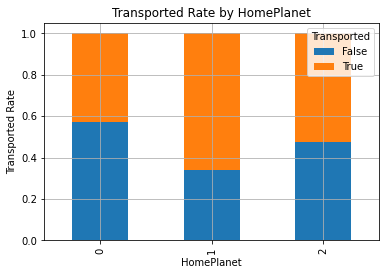

In [42]:
import matplotlib.pyplot as plt
rel_1=pd.crosstab(temp['HomePlanet'],temp['Transported'])

rel_1_normalize=rel_1.div(rel_1.sum(1).astype(float),axis=0)

rel_1_normalize.plot(kind='bar',title='Transported Rate by HomePlanet',stacked=True,grid=True) 

plt.xlabel('HomePlanet')
plt.ylabel('Transported Rate')
plt.show()

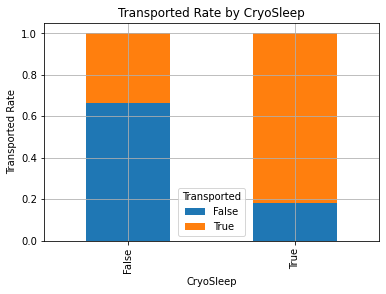

In [43]:
rel_2=pd.crosstab(temp['CryoSleep'],temp['Transported'])

rel_2_normalize=rel_2.div(rel_2.sum(1).astype(float),axis=0)

rel_2_normalize.plot(kind='bar',title='Transported Rate by CryoSleep',stacked=True,grid=True) 

plt.xlabel('CryoSleep')
plt.ylabel('Transported Rate')
plt.show()

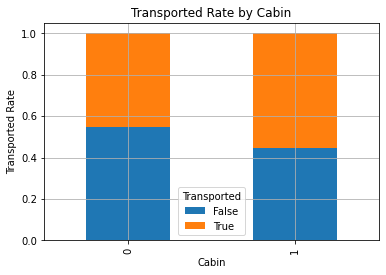

In [44]:
rel_3=pd.crosstab(temp['Cabin'],temp['Transported'])

rel_3_normalize=rel_3.div(rel_3.sum(1).astype(float),axis=0)

rel_3_normalize.plot(kind='bar',title='Transported Rate by Cabin',stacked=True,grid=True) 

plt.xlabel('Cabin')
plt.ylabel('Transported Rate')
plt.show()

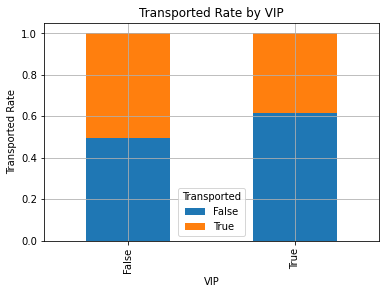

In [45]:
rel_4=pd.crosstab(temp['VIP'],temp['Transported'])

rel_4_normalize=rel_4.div(rel_4.sum(1).astype(float),axis=0)

rel_4_normalize.plot(kind='bar',title='Transported Rate by VIP',stacked=True,grid=True) 

plt.xlabel('VIP')
plt.ylabel('Transported Rate')
plt.show()

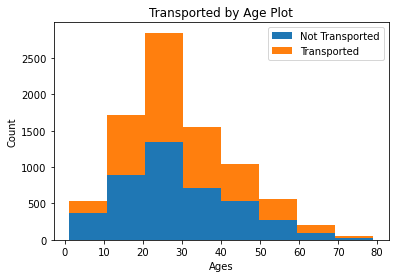

In [46]:
age_Transported=temp[temp['Transported']==1]['Age']

age_not_Transported = temp[temp['Transported'] == 0]['Age']

max_age=max(temp['Age'])

plt.hist([age_Transported,age_not_Transported],bins=8,range=(1, max_age),stacked=True)

plt.title('Transported by Age Plot')
plt.xlabel('Ages')
plt.ylabel('Count')
plt.legend(('Not Transported', 'Transported'), loc='best')
plt.show()

# Training

In [47]:
#Decision Tree
#Logistic Regression , Perceptron
#Linear SVC
#Random Forest
#Naive Bayes


In [48]:
# X = temp.iloc[:,:-1].values
# y = temp.iloc[:,-1].values

In [49]:
# # check the type and shape of X
# print(type(X))
# print(X.shape)

<class 'numpy.ndarray'>
(8693, 7)


In [50]:
# # check the type and shape of y
# print(type(y))
# print(y.shape)

<class 'numpy.ndarray'>
(8693,)


In [21]:
temp

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,Transported
0,0001_01,1,False,0,2,39.0,False,False
1,0002_01,0,False,1,2,24.0,False,True
2,0003_01,1,False,1,2,58.0,True,False
3,0003_02,1,False,1,2,33.0,False,False
4,0004_01,0,False,1,2,16.0,False,True
...,...,...,...,...,...,...,...,...
8688,9276_01,1,False,0,0,41.0,True,False
8689,9278_01,0,True,1,1,18.0,False,False
8690,9279_01,0,False,1,2,26.0,False,True
8691,9280_01,1,False,1,0,32.0,False,False


In [22]:

columns = ['HomePlanet','CryoSleep','Cabin','Destination','Age','VIP']
X_trainss = pd.DataFrame(temp, columns=columns)
X_testss = pd.DataFrame(temp2, columns=columns)
y_train = temp['Transported']
# y_test = testData['Transported']

In [23]:
from sklearn.preprocessing import StandardScaler

st_x= StandardScaler()  
X_train= st_x.fit_transform(X_trainss)    
X_test= st_x.transform(X_testss) 

# Random Forest

In [42]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=10, random_state=50, n_jobs= -1, oob_score=True, n_estimators=100, max_features=None)
%time clf.fit(X_train, y_train)
print("Training Acc: ",accuracy_score(y_train,dct.predict(X_train)))

y_prediction = clf.predict(X_test)

headers = ["PassengerId", "Transported"]

prediction = pd.DataFrame(y_prediction, columns = ['prediction'])
data = [temp2['PassengerId'], prediction['prediction']]

resultDf = pd.concat(data, axis=1, keys=headers)

resultDf.to_csv('Submission1.csv', encoding='utf-8', index=None)

Wall time: 291 ms
Training Acc:  0.7373748993443


# Decision Tree

In [43]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

dct = DecisionTreeClassifier(random_state=0,max_depth=4)
%time dct.fit(X_train,y_train)
print("Training Acc: ",accuracy_score(y_train,dct.predict(X_train)))

y_prediction_dtc = dct.predict(X_test)

headers = ["PassengerId", "Transported"]

prediction = pd.DataFrame(y_prediction_dtc, columns = ['prediction'])

data = [temp2['PassengerId'], prediction['prediction']]

resultDf = pd.concat(data, axis=1, keys=headers)

resultDf.to_csv('Submission2.csv', encoding='utf-8', index=None)


Wall time: 7.02 ms
Training Acc:  0.7373748993443


In [36]:
from sklearn.linear_model import LogisticRegression, Perceptron

percept = Perceptron(random_state=0)
%time percept.fit(X_train,y_train)
print("Training Acc: ",percept.score(X_train,y_train))



Wall time: 17 ms
Training Acc:  0.4975267456574255


In [44]:
%%time
lr = LogisticRegression(random_state=0)
lr.fit(X_train,y_train)
print("Training Acc: ",lr.score(X_train,y_train))

y_prediction_lr = lr.predict(X_test)

headers = ["PassengerId", "Transported"]

prediction = pd.DataFrame(y_prediction_lr, columns = ['prediction'])

data = [temp2['PassengerId'], prediction['prediction']]

resultDf = pd.concat(data, axis=1, keys=headers)

resultDf.to_csv('Submission3.csv', encoding='utf-8', index=None)


Training Acc:  0.7225353732888531
Wall time: 25.4 ms


In [45]:
from sklearn.svm import SVC
clf = SVC(kernel="linear")
clf.fit(X_train,y_train)
print("Training Acc: ",clf.score(X_train,y_train))

y_prediction_clf = clf.predict(X_test)

headers = ["PassengerId", "Transported"]

prediction = pd.DataFrame(y_prediction_clf, columns = ['prediction'])

data = [temp2['PassengerId'], prediction['prediction']]

resultDf = pd.concat(data, axis=1, keys=headers)

resultDf.to_csv('Submission4.csv', encoding='utf-8', index=None)


Training Acc:  0.718279075117911
